In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scipy.spatial
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import scipy.spatial
from collections import Counter
from operator import itemgetter
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns



In [14]:
df = pd.read_excel('extention of Z-Alizadeh sani dataset.xlsx')
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,39,52,261,50,0,N,Stenotic,Normal,Stenotic,CAD
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,38,55,165,40,4,N,Stenotic,Stenotic,Normal,CAD
2,54,54,164,Male,20.077335,0,0,1,0,0,...,38,60,230,40,2,mild,Stenotic,Normal,Normal,CAD
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,18,72,742,55,0,Severe,Normal,Normal,Normal,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,55,39,274,50,0,Severe,Normal,Normal,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,34,58,251,45,0,N,Stenotic,Stenotic,Stenotic,CAD
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,16,80,377,40,0,mild,Normal,Normal,Normal,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,35,55,279,55,0,N,Normal,Normal,Normal,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,48,40,208,55,0,N,Normal,Normal,Normal,Normal


In [15]:
df.iloc[:,:-1] = pd.get_dummies(df.iloc[:,:-1])
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,29.387755,0,1,1,0,0,110,...,1,1,0,1,0,1,0,1,0,CAD
1,67,70,157,28.398718,0,1,0,0,0,140,...,0,1,0,1,0,1,0,1,0,CAD
2,54,54,164,20.077335,0,0,1,0,0,100,...,0,1,0,1,0,1,0,1,0,CAD
3,66,67,158,26.838648,0,1,0,0,0,100,...,0,1,0,1,0,1,0,0,1,Normal
4,50,87,153,37.165193,0,1,0,0,0,110,...,0,1,0,1,0,0,1,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,29.761905,0,0,0,0,0,100,...,0,1,0,1,0,1,0,1,0,CAD
299,55,64,152,27.700831,0,0,0,0,0,100,...,0,1,0,1,0,0,1,1,0,Normal
300,48,77,160,30.078125,0,1,0,0,1,130,...,0,1,0,1,0,1,0,1,0,Normal
301,57,90,159,35.599858,1,0,0,0,0,100,...,0,1,0,1,0,1,0,1,0,Normal


In [16]:
label = LabelEncoder()
df['Cath'] = label.fit_transform(df['Cath'])
df

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,LAD,LCX,RCA,Cath
0,53,90,175,29.387755,0,1,1,0,0,110,...,1,1,0,1,0,1,0,1,0,0
1,67,70,157,28.398718,0,1,0,0,0,140,...,0,1,0,1,0,1,0,1,0,0
2,54,54,164,20.077335,0,0,1,0,0,100,...,0,1,0,1,0,1,0,1,0,0
3,66,67,158,26.838648,0,1,0,0,0,100,...,0,1,0,1,0,1,0,0,1,1
4,50,87,153,37.165193,0,1,0,0,0,110,...,0,1,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,29.761905,0,0,0,0,0,100,...,0,1,0,1,0,1,0,1,0,0
299,55,64,152,27.700831,0,0,0,0,0,100,...,0,1,0,1,0,0,1,1,0,1
300,48,77,160,30.078125,0,1,0,0,1,130,...,0,1,0,1,0,1,0,1,0,1
301,57,90,159,35.599858,1,0,0,0,0,100,...,0,1,0,1,0,1,0,1,0,1


In [17]:
X = df.iloc[:,:-1].to_numpy()
y = df['Cath'].to_numpy()

In [19]:
for col in df.columns:
    print(col, str(round(100* df[col].isnull().sum() / len(df), 2)) + '%')

Age 0.0%
Weight 0.0%
Length 0.0%
Sex 0.0%
BMI 0.0%
DM 0.0%
HTN 0.0%
Current Smoker 0.0%
EX-Smoker 0.0%
FH 0.0%
Obesity 0.0%
CRF 0.0%
CVA 0.0%
Airway disease 0.0%
Thyroid Disease 0.0%
CHF 0.0%
DLP 0.0%
BP 0.0%
PR 0.0%
Edema 0.0%
Weak Peripheral Pulse 0.0%
Lung rales 0.0%
Systolic Murmur 0.0%
Diastolic Murmur 0.0%
Typical Chest Pain 0.0%
Dyspnea 0.0%
Function Class 0.0%
Atypical 0.0%
Nonanginal 0.0%
Exertional CP 0.0%
LowTH Ang 0.0%
Q Wave 0.0%
St Elevation 0.0%
St Depression 0.0%
Tinversion 0.0%
LVH 0.0%
Poor R Progression 0.0%
BBB 0.0%
FBS 0.0%
CR 0.0%
TG 0.0%
LDL 0.0%
HDL 0.0%
BUN 0.0%
ESR 0.0%
HB 0.0%
K 0.0%
Na 0.0%
WBC 0.0%
Lymph 0.0%
Neut 0.0%
PLT 0.0%
EF-TTE 0.0%
Region RWMA 0.0%
VHD 0.0%
LAD 0.0%
LCX 0.0%
RCA 0.0%
Cath 0.0%


In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)

In [21]:
X

array([[0.41071429, 0.58333333, 0.72916667, ..., 0.        , 1.        ,
        0.        ],
       [0.66071429, 0.30555556, 0.35416667, ..., 0.        , 1.        ,
        0.        ],
       [0.42857143, 0.08333333, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.32142857, 0.40277778, 0.41666667, ..., 0.        , 1.        ,
        0.        ],
       [0.48214286, 0.58333333, 0.39583333, ..., 0.        , 1.        ,
        0.        ],
       [0.46428571, 0.51388889, 0.625     , ..., 0.        , 1.        ,
        0.        ]])

## K-Nearest Neighbor Classification

In [33]:
kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(X)
rata = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  neigh = KNeighborsClassifier(n_neighbors=5)
  neigh.fit(X_train, y_train)
  prediction = neigh.score(X_test, y_test)
  rata.append(prediction)

print('Mean Accuracy: ', np.mean(rata))

Mean Accuracy:  0.8058064516129033


## Fuzzy K-Nearest Neighbor (FKNN)

In [22]:
class FKNN:
    def __init__(self, k):
      self.k = k
        
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def getDistance(self, X1, X2):
      return scipy.spatial.distance.euclidean(X1, X2)

    def fuzzy(self, d, m):
      closestPoint = [ d[k][1] for k in range(len(d))]
      classes = np.unique(self.y_train[closestPoint])
      arrMembership = []
      for cls in classes:
        atas = 0
        bawah = 0
        for close in d: 
          if(close[0] != 0):
            if(cls == self.y_train[close[1]]):
              atas += np.power((1/close[0]), (2/(m-1)))
            else:
              atas += np.power((0/close[0]), (2/(m-1)))
            bawah +=  np.power((1/close[0]), (2/(m-1)))
          else:
            atas  += 0
            bawah  += 1
        arrMembership.append([atas/bawah, cls])
      return arrMembership

    def predict(self, X_test):
      final_output = []
      for i in range(len(X_test)):
          d = []
          votes = []
          for j in range(len(X_train)):
              dist = self.getDistance(X_train[j] , X_test[i])
              d.append([dist, j])
          d.sort()
          d = d[0:self.k]
          membership = self.fuzzy(d, 2)
          predicted_class = sorted(membership, key=itemgetter(0), reverse=True)
          final_output.append(predicted_class[0][1])    
      return final_output
    
    def score(self, X_test, y_test):
      predictions = self.predict(X_test)
      value = 0
      for i in range(len(y_test)):
        if(predictions[i] == y_test[i]):
          value += 1
      return value / len(y_test)

kf = KFold(n_splits=10, random_state=1, shuffle=True) 
kf.get_n_splits(X)

accuracyFKNN = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  fknn = FKNN(9)
  fknn.fit(X_train, y_train)
  prediction = fknn.score(X_test, y_test)
  accuracyFKNN.append(prediction)

print('Mean Accuracy: ', np.mean(accuracyFKNN))

Mean Accuracy:  0.8026881720430108


## Fuzzy K-Nearest Centroid Neighbor

In [27]:
class FKNCN:
    def __init__(self, k):
      self.k = k
        
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def getDistance(self, X1, X2):
      return scipy.spatial.distance.euclidean(X1, X2)

    def getFirstDistance(self, X_train, X_test):
      distance = []
      for i in range(len(X_train)):
        dist = scipy.spatial.distance.euclidean(X_train[i] , X_test)
        distance.append([i, dist, self.y_train[i]])
      return distance
  
    def getCentroid(self, arrData):
      result=[]
      dataTran = np.array(arrData).T
      for i in range(len(dataTran)):
        result.append(np.mean(dataTran[i]))
      return result

    def kncn(self, X_test):
      myclass = list(set(self.y_train))
      closestPoint = []
      anothersPoint = []
      for indexK in range(0, self.k):
        if(indexK == 0):
          distance = self.getFirstDistance(self.X_train, X_test)   
          distance_sorted = sorted(distance, key=itemgetter(1))
          closestPoint.append(distance_sorted[0])
          distance_sorted.pop(0)
          for anothers in (distance_sorted):
            anothersPoint.append(anothers[0])  
        else:
          arrDistance = []
          closestPointTemp = [self.X_train[r[0]] for r in closestPoint]
          for r in (anothersPoint):
            arrQ = closestPointTemp.copy()
            arrQ.append(self.X_train[r])
            arrDistance.append([r, self.getDistance(self.getCentroid(arrQ), X_test)])
          distance_sorted = sorted(arrDistance, key=itemgetter(1))
          closestPoint.append(distance_sorted[0])
          # anothersPoint = np.setdiff1d(anothersPoint, closestPoint)
      return closestPoint

    def fuzzy(self, d, m):
      closestPoint = [ d[k][1] for k in range(len(d))]
      classes = np.unique(self.y_train[closestPoint])
      arrMembership = []
      for cls in classes:
        atas = 0
        bawah = 0
        for close in d: 
          if(close[0] != 0):
            if(cls == self.y_train[close[1]]):
              atas += np.power((1/close[0]), (2/(m-1)))
            else:
              atas += np.power((0/close[0]), (2/(m-1)))
            bawah +=  np.power((1/close[0]), (2/(m-1)))
          else:
            atas  += 0
            bawah  += 1
        arrMembership.append([atas/bawah, cls])
      return arrMembership

    def predict(self, X_test):
      final_output = []
      for i in range(len(X_test)):
        closestPoint = self.kncn(X_test[i])
        d = []
        votes = []
        for j in range(len(X_train)):
            dist = self.getDistance(X_train[j] , X_test[i])
            d.append([dist, j])
        d.sort()

        d = d[0:self.k]
        membership = self.fuzzy(d, 2)
        predicted_class = sorted(membership, key=itemgetter(0), reverse=True)
        final_output.append(predicted_class[0][1])    
      return final_output
    
    def score(self, X_test, y_test):
      predictions = self.predict(X_test)
      value = 0
      for i in range(len(y_test)):
        if(predictions[i] == y_test[i]):
          value += 1
      return value / len(y_test)

kf = KFold(n_splits=2, random_state=1, shuffle=True) 
kf.get_n_splits(X)

rataFKNCN = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  fkncn = FKNCN(9)
  fkncn.fit(X_train, y_train)
  prediction = fkncn.score(X_test, y_test)
  rataFKNCN.append(prediction)
  
print('Mean Accuracy: ', np.mean(rataFKNCN))

Mean Accuracy:  0.8152448588358313


## Ploting

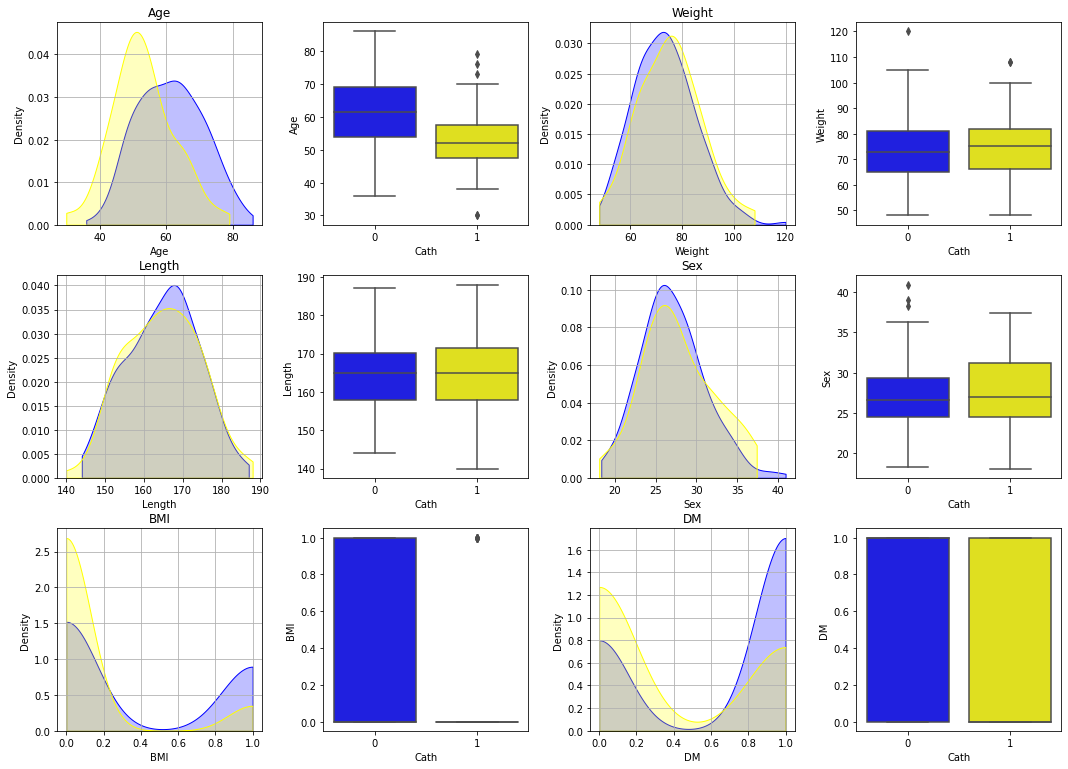

In [34]:
features = df.iloc[:,:6].columns.tolist()
plt.figure(figsize=(18, 27))

for i, col in enumerate(features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["Cath"]==0, col], label="alive", color = "blue", shade=True, cut=0)
    sns.kdeplot(df.loc[df["Cath"]==1, col], label="dead",  color = "yellow", shade=True,  cut=0)

    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = df, x="Cath", palette = ["blue", "yellow"]) 